 COVID-19 Global Data Tracker

This project analyzes global COVID-19 data, including confirmed cases, deaths, and vaccinations across selected countries over time. The aim is to gain insights into the pandemic's spread and how vaccination efforts vary globally.

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Covid 19 dataset

In [3]:
pd.read_csv('owid-covid-data.csv')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30826,BLZ,North America,Belize,2020-12-07,7601.0,218.0,279.143,172.0,2.0,4.000,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
30827,BLZ,North America,Belize,2020-12-08,7769.0,168.0,289.429,173.0,1.0,3.714,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
30828,BLZ,North America,Belize,2020-12-09,7953.0,184.0,299.857,176.0,3.0,4.000,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN
30829,BLZ,North America,Belize,2020-12-10,8013.0,60.0,308.429,179.0,3.0,4.429,...,NaN,90.083,1.3,74.62,0.716,405285.0,NaN,NaN,NaN,NaN


The dataframe

In [5]:
df=pd.read_csv('owid-covid-data.csv')

First few columns of the dataset

In [6]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Data Exploration

In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

All columns present

Data types in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216928 entries, 0 to 216927
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    216928 non-null  object 
 1   continent                                   207208 non-null  object 
 2   location                                    216928 non-null  object 
 3   date                                        216928 non-null  object 
 4   total_cases                                 199593 non-null  float64
 5   new_cases                                   213380 non-null  float64
 6   new_cases_smoothed                          212600 non-null  float64
 7   total_deaths                                188581 non-null  float64
 8   new_deaths                                  213413 non-null  float64
 9   new_deaths_smoothed                         212638 non-null  float64
 

In [9]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.995930e+05,2.133800e+05,2.126000e+05,1.885810e+05,213413.000000,212638.000000,199593.000000,213380.000000,212600.000000,188581.000000,...,127620.000000,87263.000000,152550.000000,201749.000000,167709.000000,2.169270e+05,8106.000000,8106.000000,8106.000000,8106.000000
mean,5.473169e+06,8.172240e+03,8.201926e+03,6.023593e+04,62.655283,62.882250,106777.644960,153.527184,154.083989,868.561737,...,33.563879,50.420266,3.026989,73.587520,0.719744,1.180416e+08,37577.335560,9.720653,11.410887,1664.615371
std,3.066995e+07,1.006837e+05,8.089294e+04,2.648134e+05,456.221067,377.118706,158454.940064,1085.776436,598.592290,1067.866785,...,13.744675,32.861706,2.527408,7.631985,0.151010,5.131952e+08,102435.736883,12.278586,25.626728,1987.092747
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.397000,3.801000e+03,-37726.098000,-44.230000,-70.590000,-2752.924800
25%,9.239000e+03,0.000000e+00,7.140000e-01,1.410000e+02,0.000000,0.000000,2906.264000,0.000000,0.151000,62.984000,...,21.400000,16.603000,1.300000,67.920000,0.602000,5.237980e+05,106.650003,1.460000,-1.785000,78.780970
50%,7.324500e+04,3.000000e+00,2.914300e+01,1.024000e+03,0.000000,0.143000,28381.167000,0.266000,7.813000,401.078000,...,33.700000,50.540000,2.200000,75.050000,0.742000,5.302690e+06,4281.099850,7.815000,5.945000,1057.968050
75%,6.370080e+05,2.630000e+02,4.757140e+02,1.044200e+04,3.000000,4.714000,143340.036000,36.966000,88.320500,1356.019000,...,44.400000,83.741000,4.210000,79.460000,0.838000,2.617741e+07,28685.926750,15.607500,16.907500,2751.244325
max,4.259884e+08,7.213802e+06,6.109825e+06,2.914272e+06,20625.000000,8584.857000,737554.506000,193107.077000,31207.174000,5664.148000,...,76.100000,98.999000,13.800000,86.750000,0.955000,4.721383e+09,902478.100000,70.810000,377.630000,10292.916000


Checking for missing values

In [10]:
df.isnull().sum()

,0
iso_code,0
continent,9720
location,0
date,0
total_cases,17335
...,...
population,1
excess_mortality_cumulative_absolute,208822
excess_mortality_cumulative,208822
excess_mortality,208822


Converting 'date' to datetime format

In [35]:
df['date'] = pd.to_datetime(df['date'])

Filtering for countries of interest

In [39]:
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
filtered_df = df[df['location'].isin(countries)]

Handling missing numeric values

In [40]:
cleaned_df = filtered_df.groupby('location').apply(lambda x: x.ffill())


<ipython-input-40-6c139db55108>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_df = filtered_df.groupby('location').apply(lambda x: x.ffill())


Filling in missing values

In [37]:
df[['total_cases', 'total_deaths', 'total_vaccinations']] = df[
    ['total_cases', 'total_deaths', 'total_vaccinations']
].ffill()

Calculating death rate

In [41]:
cleaned_df['death_rate'] = cleaned_df['total_deaths'] / cleaned_df['total_cases']

Line graph depicting Total COVID-19 Cases over Time

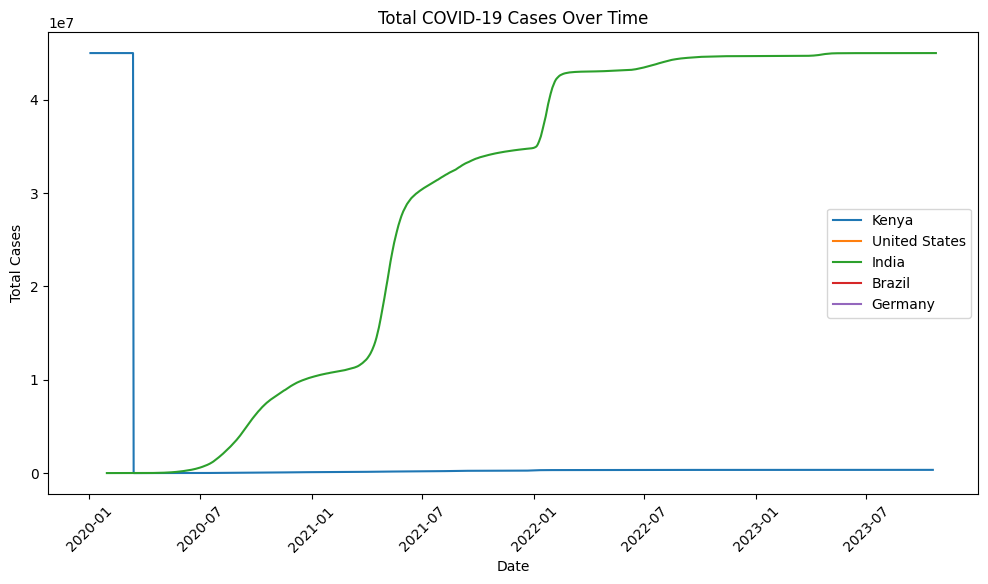

In [42]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


 For most countries, the total number of COVID-19 cases generally shows an increasing trend over the period displayed (early 2020 to late 2023). This reflects the progression of the pandemic.
 kenya:The total number of cases remains significantly lower than the other countries shown.
 United States:Experiences multiple distinct waves of infection, characterized by steeper inclines in the curve.
 India:Experiences a dramatic surge in total cases around mid-2020 and again more sharply in early to mid-2021, indicating significant infection waves.

COVID-19 Deaths Over Time (by Country)

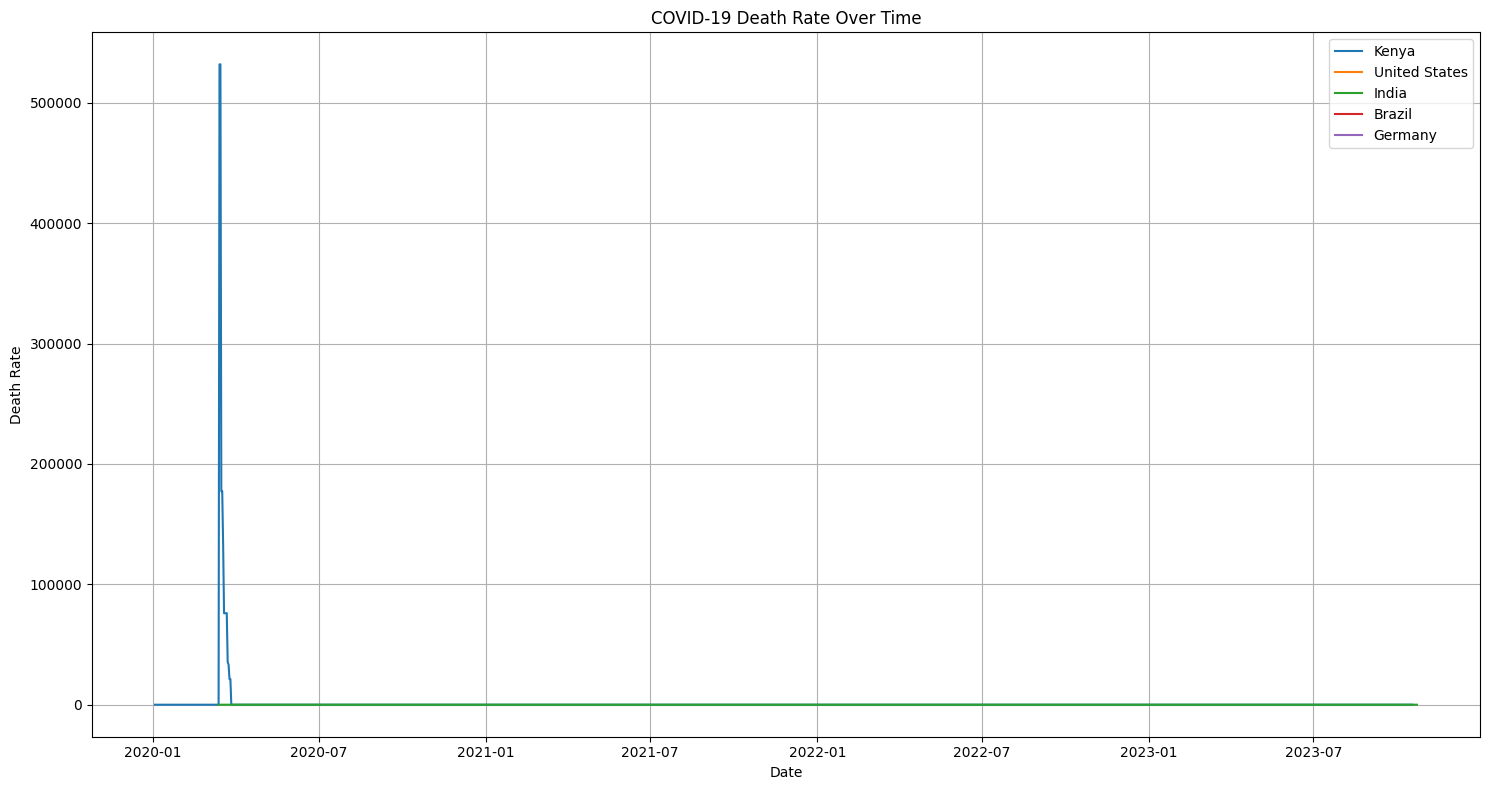

In [46]:
plt.figure(figsize=(15, 8))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


For the majority of the period shown early 2020 to late 2023, the death rates for the United States, India, Brazil, and Germany appear to be very low, close to zero on this scale. This suggests that the number of deaths per unit of population here was relatively small compared to the total population or case numbers.

 Comparison Daily New Cases

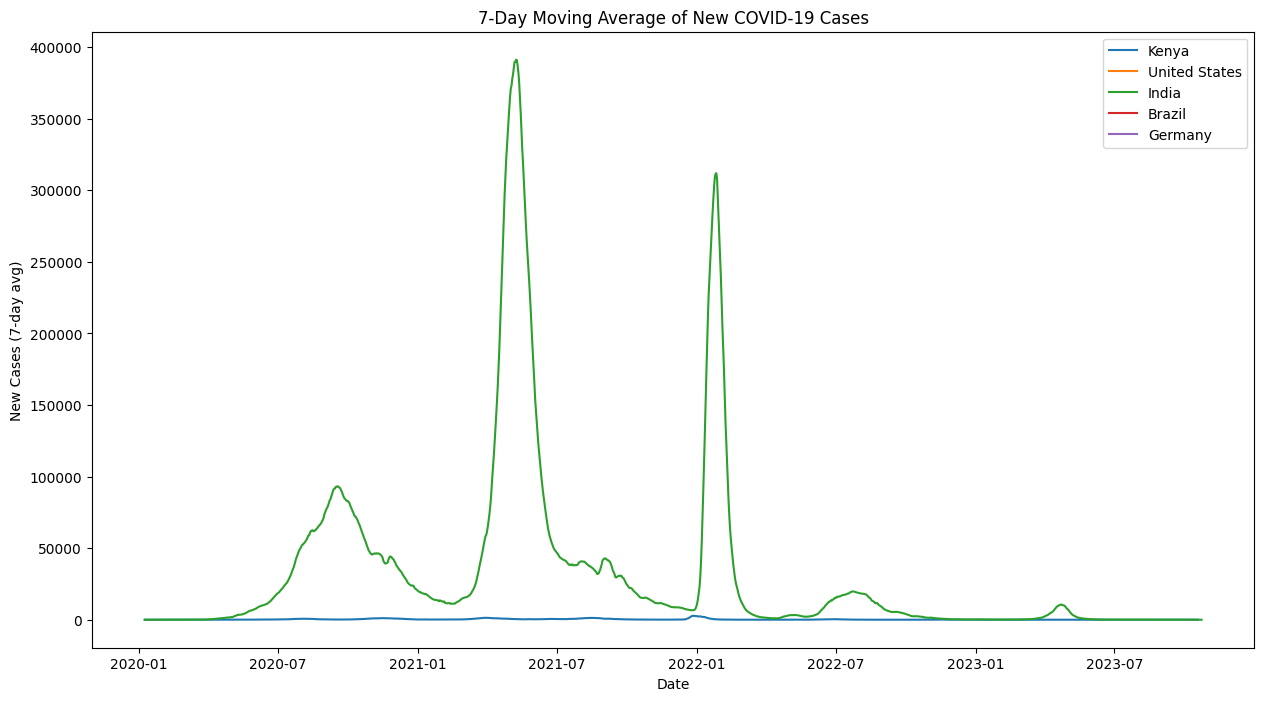

In [44]:
plt.figure(figsize=(15, 8))

for country in countries:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'].rolling(7).mean(), label=country)

plt.title('7-Day Moving Average of New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases (7-day avg)')
plt.legend()
plt.show()


All countries show unique waves of new infections, characterized by peaks in the 7-day moving average. The timing and magnitude of these waves vary significantly between countries.
Most countries experienced multiple waves of infection, emphasizing the dynamic nature of the pandemic.

Vaccination analysis

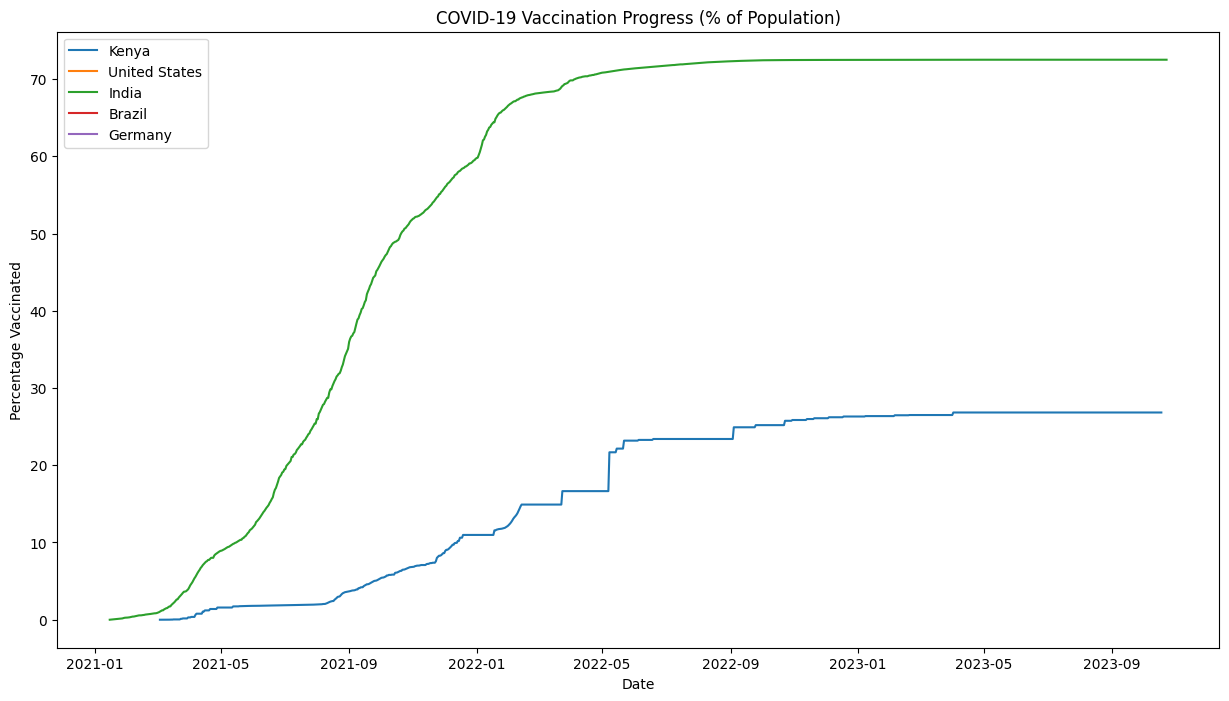

In [50]:

cleaned_df['vaccination_percentage'] = (cleaned_df['people_vaccinated'] / cleaned_df['population']) * 100

plt.figure(figsize=(15, 8))

for country in countries:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['vaccination_percentage'], label=country)

plt.title('COVID-19 Vaccination Progress (% of Population)')
plt.xlabel('Date')
plt.ylabel('Percentage Vaccinated')
plt.legend()
plt.show()

For all countries, the percentage of the population vaccinated generally increases over time, as expected with vaccination campaigns rolling out.
The United States had a relatively early and fast start, while India's campaign gained significant speed later. Kenya's progress appears to have been slower overall.

Choropleth Map

In [51]:
import plotly.express as px
latest_data = df.sort_values('date').groupby('location').last().reset_index()


fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases per Million People")
fig.show()